<a href="https://colab.research.google.com/github/TJ-Solergibert/Suma-excels-por-carpetas/blob/main/SumaDeExcelsPorCarpetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar archivo comprimido con las carpetas


El archivo ha de ser un .zip con una estructura en concreto. 

Esta programado para trabajar con un .zip que directamente tenga las carpetas de cada comunidad autonoma y dentro los archivos excel.



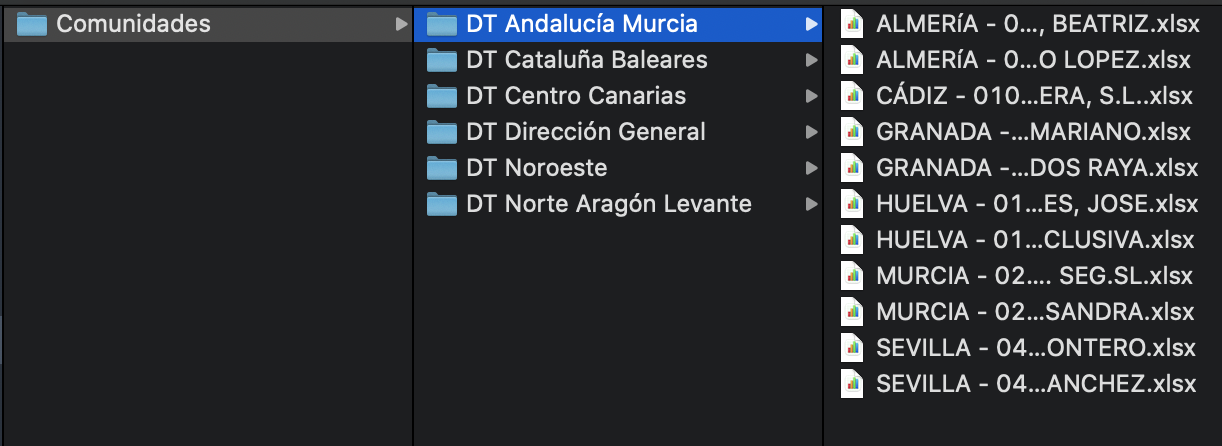

In [ ]:
from google.colab import files
files.upload()

#Importar librerias

In [ ]:
import pandas as pd
import os
import zipfile

#Descomprimir archivos

## Localizamos el archivo comprimido

In [ ]:
path_to_zip_file = os.getcwd()
path_to_zip_file = os.path.join(path_to_zip_file, 'Comunidades.zip')
print(path_to_zip_file)

/content/Comunidades.zip


## Localizamos donde descomprimiremos el archivo

In [ ]:
directory_to_extract_to = os.getcwd()
directory_to_extract_to = os.path.join(directory_to_extract_to, 'Comunidades')
print(directory_to_extract_to)

/content/Comunidades


## Descomprimimos el archivo

In [ ]:
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

# Un ejemplo para ver que datos vamos a manejar

In [ ]:
archivo = "/content/Comunidades/DT Andalucía Murcia/ALMERíA - 0030000728 - CONTRERAS RAMOS, BEATRIZ.xlsx"
print(archivo)                                                               # Primero localizamos el directorio de un archivo

/content/Comunidades/DT Andalucía Murcia/ALMERíA - 0030000728 - CONTRERAS RAMOS, BEATRIZ.xlsx


In [ ]:
ejemplo = pd.read_excel(archivo)                                                # Abrimos el archivo. Como se puede observar, contiene muchas celdas vacias
ejemplo

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,PLAN DE ACCIÓN LEÓNIDAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEDIADOR:,30000728,"CONTRERAS RAMOS, BEATRIZ",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SUCURSAL:,ALMERíA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1. DIAGNÓSTICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Tras la reunión con el mediador, indica, de la...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Valóralas de 0 a 5 (0 no ocurre; 5 ocurre con ...,NaN,Valoración (0-5),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ejecución de la Retención,Falta de atención en la actividad de retención,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Falta de dedicación de tiempo para la retención,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Falta de formación - No conoce la UGAC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
serie_ejemplo = ejemplo["Unnamed: 2"][7:21]                                     # Nos centramos ahora en las celdas que nos interesan
serie_ejemplo

7     0
8     0
9     0
10    0
11    0
12    3
13    4
14    0
15    0
16    0
17    0
18    0
19    0
20    0
Name: Unnamed: 2, dtype: object

In [ ]:
type(serie_ejemplo)                                                             # La variable "serie_ejemplo" que almacena las celdas que nos interesan es una Serie de pandas

pandas.core.series.Series

In [ ]:
Dataframe_ejemplo = serie_ejemplo.to_frame()                                    # Pero nos interesa que sea un Dataframe de pandas por lo que la transformamos con la función "to_frame()"
type(Dataframe_ejemplo)

pandas.core.frame.DataFrame

In [ ]:
Dataframe_ejemplo                                                               # Ahora ya hemos conseguido construir un Dataframe con las celdas que nos interesan

,Unnamed: 2
7,0
8,0
9,0
10,0
11,0
12,3
13,4
14,0
15,0
16,0


In [ ]:
Nombre_filas_bueno = {7: 'Falta de atención en la actividad de retención',      # Como hemos podido observar, las filas no contienen el nombre de los datos. Crearemos un diccionario con 
                      8:'Falta de dedicación de tiempo para la retención',      # los nombres que deseamos para al final renombrar las filas
                      9:'Falta de formación - No conoce la UGAC', 
                      10:'Falta de formación - Argumentarios',
                      11:'Falta de formación - Productos', 
                      12:'Subidas de prima por recuperación de descuentos', 
                      13:'Ataques fuertes de la competencia - precio', 
                      14:'Frecuentes problemas de servicio al cliente', 
                      15:'Problemas locales de cuadro médico', 
                      16:'Los clientes se van buscando un producto mejor', 
                      17:'Ataque de otro distribuidor muy potente en la zona', 
                      18:'Problemas económicos acuciados en la zona', 
                      19:'Caídas puntuales de negocios grandes', 
                      20:'Otros'}

# Código final

In [ ]:
Dataframe_final = pd.DataFrame()                                                # Creamos el Dataframe final donde cada columna sera la suma de los diferentes datos por carpetas 

for carpeta in os.listdir(directory_to_extract_to):                             # En cada subcarpeta de la carpeta "Comunidades"
  directorio_carpeta = os.path.join(directory_to_extract_to, carpeta)
  #print(directorio_carpeta)                                                    # Un print para comprobar que estamos en el directorio de la carpeta
  total_carpeta = pd.DataFrame().reindex_like(Dataframe_ejemplo)                # Creamos un Dataframe de la forma de las celdas que seleccionaremos por cada archivo (13 filas 1 columna)
  
  for archivo in os.listdir(directorio_carpeta):                                # Por cada archivo de la subcarpeta
    directorio_archivo = os.path.join(directorio_carpeta, archivo)
    #print(directorio_archivo)                                                  # Un print para comprobar que estamos en el directorio del archivo
    excel = pd.read_excel(directorio_archivo)                                   # Leemos el archivo .xlsx
    serie_archivo = excel["Unnamed: 2"][7:21]                                   # Cogemos las celdas que nos interesan. Obtenemos una Serie de pandas
    serie_archivo_f = serie_archivo.to_frame()                                  # Transformamos esa serie a un Dataframe para trabajar mejor
    total_carpeta = total_carpeta.add(serie_archivo_f, fill_value = 0)          # Sumamos las celdas que hemos seleccionado a las totales de la carpeta
  
  total_carpeta = total_carpeta.rename(columns = {'Unnamed: 2':carpeta})        # Nombramos cada columna por el nombre de la carpeta
  #total_carpeta = total_carpeta / len(os.listdir(directorio_carpeta))          # Esta linea sirve para calcular la media de puntuaciones por carpeta
  #print(len(os.listdir(directorio_carpeta)))
  Dataframe_final = pd.concat([Dataframe_final, total_carpeta], axis = 1)       # Añadimos los datos de cada carpeta al archivo final

Dataframe_final = Dataframe_final.rename(index = Nombre_filas_bueno)            # Cambiamos el nombre de las filas 

In [ ]:
Dataframe_final

,DT Noroeste,DT Cataluña Baleares,DT Norte Aragón Levante,DT Centro Canarias,DT Dirección General,DT Andalucía Murcia
Falta de atención en la actividad de retención,8,20,8,30,0,0
Falta de dedicación de tiempo para la retención,7,26,10,42,0,10
Falta de formación - No conoce la UGAC,4,4,14,19,0,1
Falta de formación - Argumentarios,7,10,9,14,0,5
Falta de formación - Productos,35,85,107,19,5,8
Subidas de prima por recuperación de descuentos,34,97,95,62,3,34
Ataques fuertes de la competencia - precio,15,57,27,60,0,31
Frecuentes problemas de servicio al cliente,8,18,11,39,0,6
Problemas locales de cuadro médico,10,12,20,25,0,12
Los clientes se van buscando un producto mejor,7,17,6,14,0,5


In [ ]:
Dataframe_final.to_excel('Output.xlsx')                                         # Generamos un excel con el nombre 'Output.xlsx'
files.download('Output.xlsx')                                                   # Descargamos el archivo con los resultados

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>